# Filtering the dataset to use in the project.

In [5]:
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')

In [7]:
srp = pd.read_csv('data/mumbai.csv')
print(srp.shape)
srp.head()

(9514, 55)


,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
0,69306824,X69306824,S,New brand 3bhk farmhouse with 68 guntha land f...,Farm House,Mumbai Beyond Thane,1.0,1,3.0,477941.0,...,2 weeks ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",14.0,[{'text': '9 Hospitals'}],NaN,NaN,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th...",1.0,NaN
1,70915032,R70915032,S,Our residential plots & commercial plots are a...,Residential Land,Navi Mumbai,1.0,1,NaN,381.0,...,6 days ago,['FEATURED'],"['CORNER PROPERTY', 'NORTH-EAST FACING', 'CIDC...",NaN,NaN,city prop,city prop,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU...",NaN,NaN
2,70916930,G70916930,P,Spacious bedroom with \nDouble size bed with d...,Residential Apartment,Thane,NaN,0,1.0,51.0,...,4 days ago,[],"['FURNISHED', 'PRIVATE ROOM']",49.0,"[{'text': '2 Religious Places'}, {'text': '1 A...",Highway Darshan,Highway Darshan,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",1.0,1.0
3,70484400,H70484400,P,Pg for boys and girls available with price of:...,Residential Apartment,Thane,NaN,0,4.0,6.0,...,4 weeks ago,[],"['FURNISHED', 'SHARED BY 2']",39.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...","Terraform Petunia, G Corp","Terraform Petunia, G Corp","{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",2.0,11.0
4,70484128,A70484128,P,Pg for boys and girls in thane with below pric...,Residential Apartment,Thane,NaN,0,4.0,6.0,...,4 weeks ago,[],"['FURNISHED', 'SHARED BY 2']",50.0,"[{'text': '1 Shopping'}, {'text': '2 Religious...",nul,nul,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",2.0,25.0


In [8]:
srp.columns

Index(['SPID', 'PROP_ID', 'PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY',
       'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE',
       'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME',
       'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID',
       'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS',
       'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE',
       'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL',
       'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME',
       'BUILDING_NAME', 'location', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

<Axes: ylabel='Missing values (in %)'>

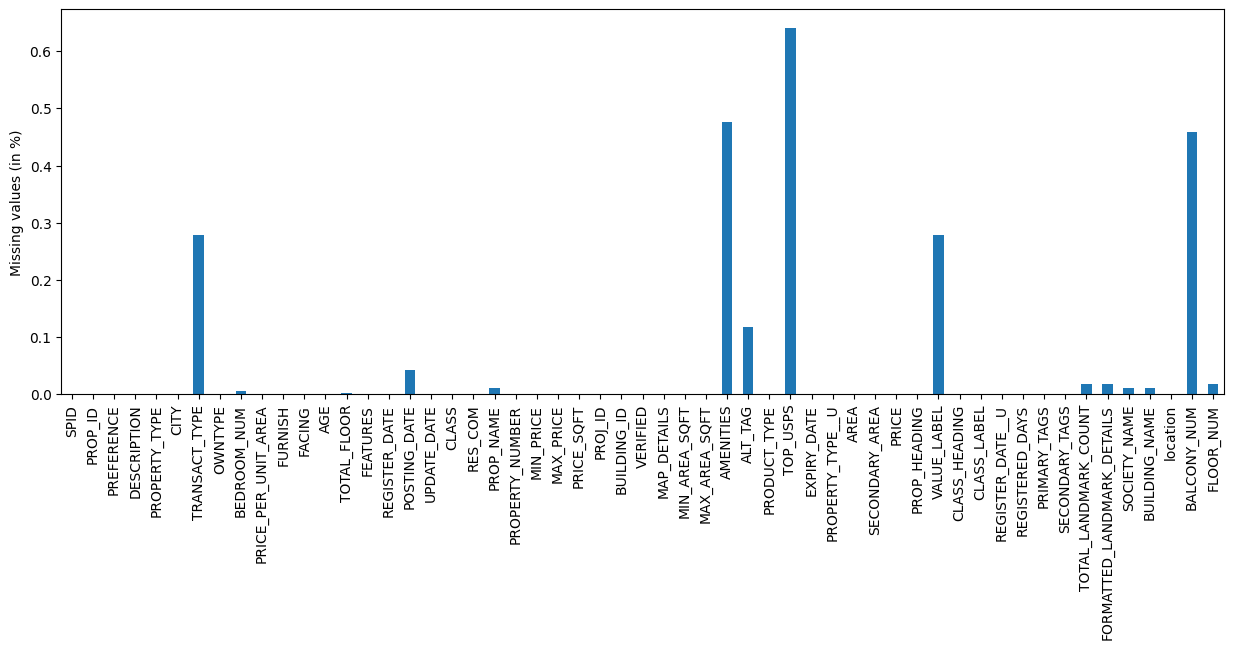

In [10]:
srp.isnull().sum().div(srp.shape[0]).plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')

### Select important columns

In [11]:
regular_cols = [
    'SPID',
    'PROP_ID',
    'CITY',
]

price_cols = [
    'PRICE',
    'MAX_PRICE',
    'MIN_PRICE',
    'PRICE_SQFT',
]

area_cols = [
    'AREA',
    'SECONDARY_AREA',
    'MAX_AREA_SQFT',
    'MIN_AREA_SQFT',
    'PRICE_PER_UNIT_AREA',
]

extra_cols = [
    'SECONDARY_TAGS',
    'TOTAL_LANDMARK_COUNT',
    'FORMATTED_LANDMARK_DETAILS',
    'MAP_DETAILS',
    'PROP_HEADING',
    'DESCRIPTION',
    'PROPERTY_TYPE',
    'location',
    'FURNISH',
    'FACING',
    'AGE',
    'TOTAL_FLOOR',
    'FEATURES',
]

missing_cols = [
    'BEDROOM_NUM',  # need to extract the BHK detials
    # 'BATHROOM_NUM',  # not available
    'AMENITIES',
    'PROP_NAME',
    'BALCONY_NUM',
    'FLOOR_NUM',
]

len(regular_cols), len(extra_cols), len(price_cols), len(area_cols), len(missing_cols)

(3, 13, 4, 5, 5)

In [12]:
all_cols = regular_cols + price_cols + area_cols + extra_cols + missing_cols
len(all_cols)

30

In [13]:
df = srp[all_cols].copy()
df.shape

(9514, 30)

In [14]:
num_cols = df.select_dtypes(['float', 'int']).columns
cat_cols = df.select_dtypes('object').columns

len(cat_cols), len(num_cols)

(16, 14)

<Axes: ylabel='Missing values (in %)'>

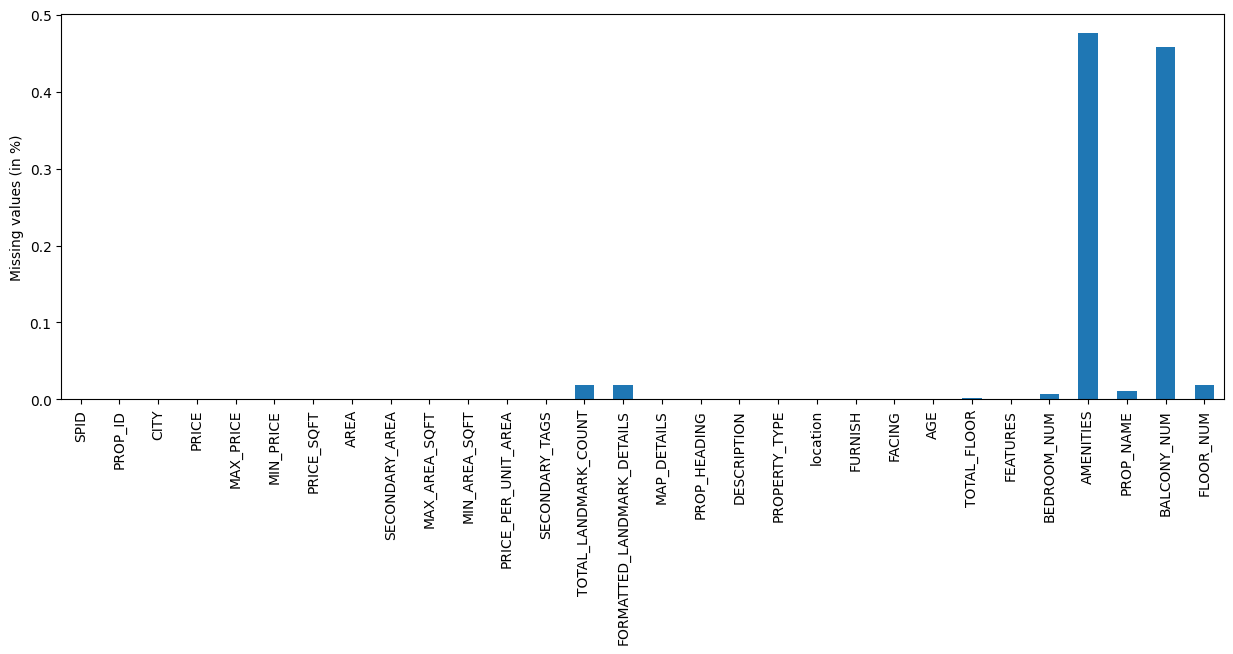

In [15]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')
)

In [16]:
df['PROP_ID'].duplicated().sum()

np.int64(14)

In [17]:
df['CITY'].value_counts()

CITY
Navi Mumbai               2194
Central Mumbai suburbs    1753
Mumbai Andheri-Dahisar    1554
Thane                     1483
South Mumbai               810
Mumbai Beyond Thane        509
Mumbai Harbour             418
Mira Road And Beyond       405
Mumbai South West          388
Name: count, dtype: int64

In [18]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        9126
Studio Apartment              137
Independent House/Villa       108
Residential Land               60
Serviced Apartments            44
Independent/Builder Floor      34
Farm House                      5
Name: count, dtype: int64

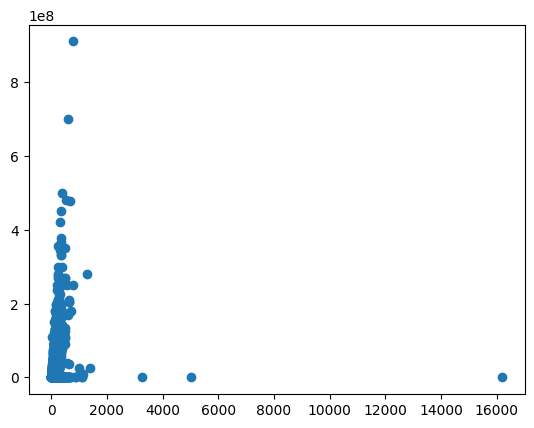

In [19]:
temp = df.query("PROPERTY_TYPE=='Residential Apartment'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

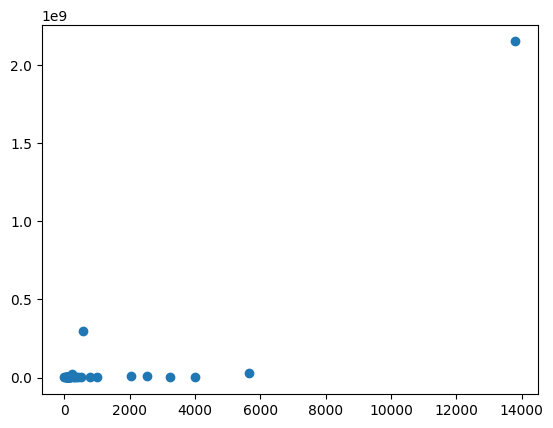

In [20]:
temp = df.query("PROPERTY_TYPE=='Residential Land'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

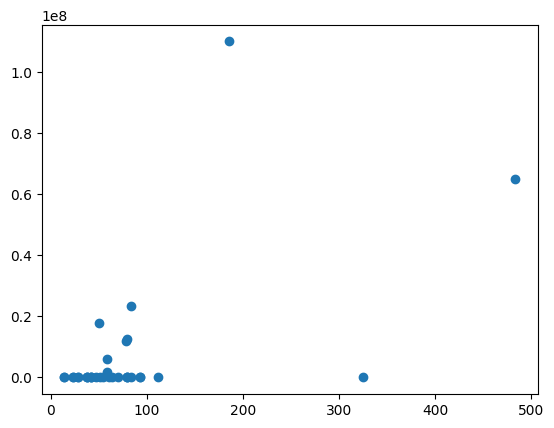

In [21]:
temp = df.query("PROPERTY_TYPE=='Independent/Builder Floor'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

## Export the dataset

In [24]:
df.to_csv('data/processed/mumbai.csv', index=False)